# Inicio a Séries temporais

Uma série temporal é definida como um conjunto de valores que se modificam em intervalos iguais de tempo.

### Exemplos de séries temporais:<br>
<ol>
<li>Valor de ativos na bolsa de valores</li>
<li>População de um país</li> 
<li>Demanda por um determinado produto</li> 

Os modelos utilizados para descrever séries temporais são processos estocásticos, isto é, processos controlados por leis probabilísticas. 

Temos na literatura um número muito grande de modelos diferentes para descrever o comportamento de uma série particular. A construção destes modelos depende de vários fatores, tais como o comportamento do fenômeno ou o conhecimento apriori que temos de sua natureza e do objetivo de análise. O pacote ***pandas*** possui um conjunto de funcionalidaddes que auxiliam na análise de séries temporais. Para apresentar essas funcionalidades, utilizaremos os dados contidos no arquivo ***timeline.csv*** representando os trending topícs de pesquisas na internet. 

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv('dados/timeline.csv')
df.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


Nesse exemplo temos três tópicos de pesquisa com estística de pesquisa coletada mensalmente

# Trabalhando com datas

Executando o comando *DataFrame .info ()* é possível observar que a coluna *month* foi interpretada como tipo *object*


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   month    168 non-null    object
 1   diet     168 non-null    int64 
 2   gym      168 non-null    int64 
 3   finance  168 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


O primeiro passo para a análise de Séries Temporais é a conversão da coluna *month* para o tipo especial *datetime*. Para tanto, utilizaremos a função *pd.to_datetime()*

In [14]:
df.month = pd.to_datetime(df.month)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   month    168 non-null    datetime64[ns]
 1   diet     168 non-null    int64         
 2   gym      168 non-null    int64         
 3   finance  168 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.4 KB


Em seguida, transformaremos a coluna *month* como a coluna idexadora dos demais utilizando o comando *DataFrame.set_index()*.

In [15]:
df.set_index('month', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2004-01-01 to 2017-12-01
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   diet     168 non-null    int64
 1   gym      168 non-null    int64
 2   finance  168 non-null    int64
dtypes: int64(3)
memory usage: 5.2 KB


O efeito dessa transformação é a criação de um novo index do tipo *DateTimeIndex*

In [16]:
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


# Plotando séries temporais

Inicialmente faremos a plotagem dos três trendding topics. Para plotar todos os dados utilizando em um único gráfico utilizamos o comando *DataFrame.plot()*. Para modificar o tamanho do gráfico, passamos o parâmetro figsize=(15,6), aumentando a largura e altura do gráfico para 15 e 6, respectivament.

Text(0.5, 0, 'Data')

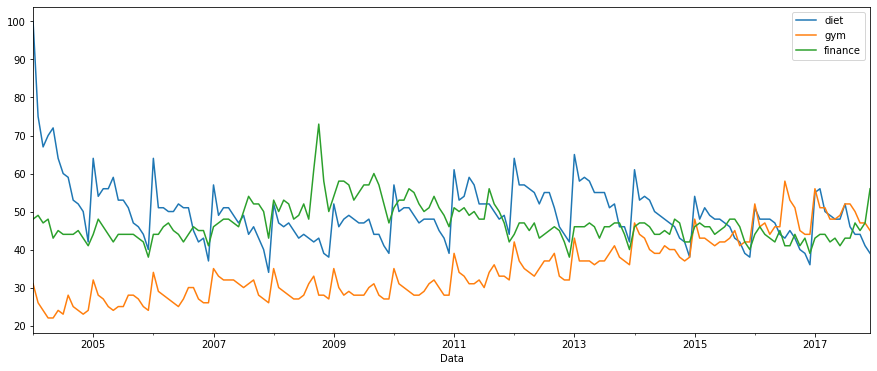

In [17]:
df.plot(figsize=(15, 6))
plt.xlabel('Data')

Observamos três comportamentos distintos. Aparetemente, a frequência de pesquisas sobre dieta teve uma diminuição desde o início de 2004 até o final de 2017. Já a frequência de pesquisas sobre academia aparenta ter subido durante o mesmo intervalo de tempo. As pesquisas sobre finanças se manteram aparentemente estáveis durante os 13 anos.

# Analisando tendências 

Faremos a análise somente das pesquisas sobre dieta. Observe que, por conta da ocilação das pesquisas, fica difícil de confirmar qualquer tipo de tendência na frequência de pesquisa. Essas ocilações podem ser provocadas pela sazonalidade das pesquisas ou pela variabilidade natural da mesma. 

<AxesSubplot:xlabel='month'>

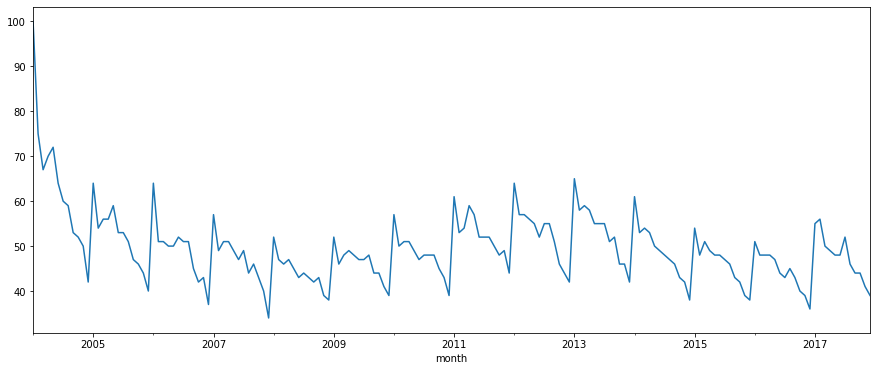

In [18]:
df.diet.plot(figsize=(15, 6))

### Média móvel simples (MMS)
Uma das técnicas comuns para eliminação do ruído é a aplicação das médias móveis (em inglês rolling averages). 

Considere a série temporal $Z_1, Z_2, \ldots, Z_n$.
A técnica da média móvel consiste em calcular a média aritmética das $k$ observações mais recentes, ou seja

$$M_t = \frac{Z_t, Z_{t-1}, \ldots, Z_{t-k+1}}{k}$$

Detonamos por $k$ como sendo o comprimento da média.

Para plotar as médias móveis para 12 períodos, utlizamos o comando *Series.rolling(numero_de_periodos) .mean() .plot().*

<AxesSubplot:xlabel='month'>

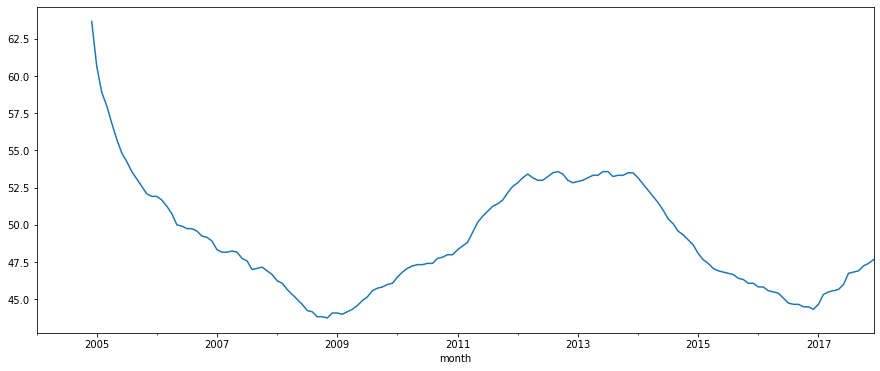

In [19]:
df.diet.rolling(12).mean().plot(figsize=(15, 6))

Analisando o gráfico das médias móveis é possível observar com mais clareza que a pesquisa sobre dieta estava em alta no início de 2004 e sofreu queda até o final de 2008. De 2009 até 2012 teve mais um crescimento ficando estável até 2014, onde sofreu mais uma queda até 2017. 

<AxesSubplot:xlabel='month'>

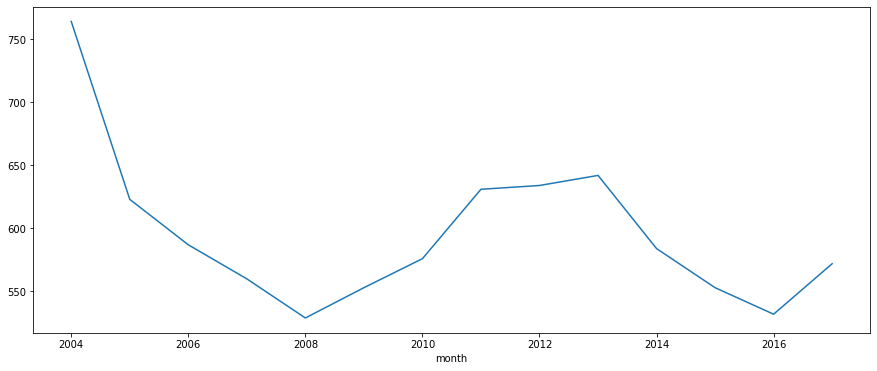

In [20]:
df.diet.groupby(df.index.year).sum().plot(figsize=(15, 6))